<a href="https://colab.research.google.com/github/upjun11/r/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%ED%8C%8C%EC%9D%B4%EC%8D%AC_0417(7%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 3장 케라스 **
 04. 모델세부 설정

4-1. 가중치 초기화(Weight Initialization)


*   머신러닝, 딥러닝 모델학습에 있어서 초기 가중치 설정은 
매우 중요하다
*   가중치의 설정에 따라 기울기 소실문제 또는 표현력의 한계를 갖는 여러가지 문제가 발생
*  Overfitting / Underfitting 문제 발생



1. zero Initialization : 순전파떄 초기 가중치가 모두 0 이라면 두번쨰 층도 모두 0 이되어서 가중값의 변화가없음
2. random Initialization : 활성화 함수값이 0.5에 치우친다.
이렇게 되면 여러층의 랜덤 레이더들 사용할 이유가없다.

* xavier Initialization : tanh(), sigmod()
* h Initialization : ReLu() 

4-2. 규제(Regulaization)
1. 과대적합(모델이 학습 데이터셋에 과도하게 fit되어 일반화 성능이 떨어지는 현상) 을 방지하기 위한 방법

2. Neural Network 의 특정 weight(가중치) 가 너무 커지는것을 방지 하기 위한 규제

* L1 Regulaization : weight 업데이트시 작은 weight는 0 으로 수렴, 몇몇 중요한 weight만 남김.
* L2 Regulaization) : L1의 미분불가능한 단점을 보완하고 weight의 크기가 직접적인 영향을 끼치도록 설계



4-3. Dropout
1. 각층에서 활성화 함수를 미니 배치의 스케일을 정규화한다.
2. 안정적인 훈련이 가능하고 성능향상의 효과가있다.

4-5. 활성화 함수
1. ReLu : ReLu(x)=max(x,0) , LeakyLeUr=max(x,0.01x)
2. sigmoid 함수
3. tanh함수 


In [13]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform', activation='relu')

In [14]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'normal', activation='relu')

In [15]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal', activation='relu')

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
##데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

## 4-1 가중치 초기화
1. he_uniform : 활성화 함수가 ReLu 인 경우 사용
2. glorot_uniform : 활성화 함수가 Sigmoid, Tahn 인 경우 사용


In [60]:
from keras.layers.serialization import activation
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, activation = 'relu'),
                              tf.keras.layers.Dense(32, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [61]:
adam = tf.keras.optimizers.Adam(lr=0.001)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']))

SyntaxError: ignored

In [38]:
####kernel_initializer = 'he_normal'을 적용한 경우
model_w_he = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, activation = 'relu'),
                              tf.keras.layers.Dense(32, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [49]:
adam = tf.keras.optimizers.Adam(lr=0.001)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [50]:
model_w_he.compile(optimizer='adam', loss = 'sprse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5388 - accuracy: 0.7392 - val_loss: 0.4993 - val_accuracy: 0.8702
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4223 - accuracy: 0.8904 - val_loss: 0.3911 - val_accuracy: 0.9039
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.9240 - val_loss: 0.2755 - val_accuracy: 0.9309
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2062 - accuracy: 0.9442 - val_loss: 0.1908 - val_accuracy: 0.9483
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1607 - accuracy: 0.9545 - val_loss: 0.1571 - val_accuracy: 0.9558
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1400 - accuracy: 0.9608 - val_loss: 0.1979 - val_accuracy: 0.9525
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9655 - val_loss: 0.1613 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

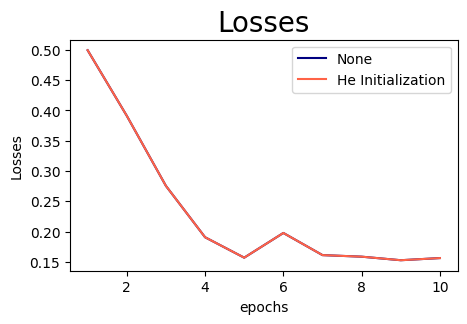

In [65]:
##두 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

In [53]:
###keral_initializer = 'glorot_normal'을 적용한 경우
model_w_gl = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal',activation = 'sigmoid'),
                             tf.keras.layers.Dense(32, activation = 'sigmoid'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_gl.summary()
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_w_gl.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_w_gl = model_w_gl.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7620 - accuracy: 0.8156 - val_loss: 0.4440 - val_accuracy: 0.8815
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4037 - accuracy: 0.8817 - val_loss: 0.3619 - val_accuracy: 0.8929
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3745 - accuracy: 0.8866 - val_loss: 0.3671 - val_accuracy: 0.8877
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3401 - accuracy: 0.8975 - val_loss: 0.3137 - val_accuracy: 0.9058
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3168 - accuracy: 0.9029 - val_loss: 0.2959 - val_accuracy: 0.9124
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3036 - accuracy: 0.9071 - val_loss: 0.2834 - val_accuracy: 0.9138
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2890 - accuracy: 0.9121 - val_loss: 0.2906 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

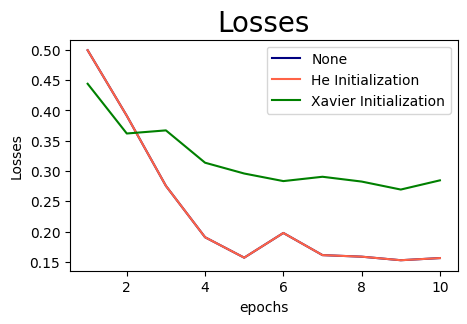

In [66]:
##세개개 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.plot(np.arange(1,11), history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

규제(Regularization)

1. L1: 가중치의 절대값에 0.001을 곱하여 비용 추가, 0.001
2. L2: 가중치의 제곱에 0.001을 곱하여 비용 추가, 0.001

In [67]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer2 = regularizer2, activation = 'relu')
    tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer2 = regularizer2, activation = 'relu')
    tf.keras.layers.Dense(10, activation = 'softmax')
])

SyntaxError: ignored

In [69]:
L2_model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
L2_model = L2_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

NameError: ignored